In [ ]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 6.2 MB/s eta 0:00:00


In [ ]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from datasets import load_dataset

# IMDb veri setini yükle
dataset = load_dataset('imdb')

# Eğitim veri setini bir DataFrame'e çevir
df = pd.DataFrame(dataset['train'])

# İlk birkaç satıra göz atalım
print(df.head())





                                                text  label
0  I rented I AM CURIOUS-YELLOW from my video sto...      0
1  "I Am Curious: Yellow" is a risible and preten...      0
2  If only to avoid making this type of film in t...      0
3  This film was probably inspired by Godard's Ma...      0
4  Oh, brother...after hearing about this ridicul...      0


In [ ]:
# X ve y tanımları eksikti, onları ekleyelim
X = dataset['train']['text']  # Yorumlar
y = dataset['train']['label']  # 0 = olumsuz, 1 = olumlu

# Veriyi eğitim ve test setlerine bölelim (random_state ekli)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vektörleştirme adımı (TF-IDF önerisiyle güncellendi)
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, min_df=5)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Modeli tekrar eğitelim
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_vec, y_train)

# Test verisiyle tahmin yapalım
y_pred = svm_model.predict(X_test_vec)

# Model performansını ölçelim
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.885
Precision: 0.8759842519685039
Recall: 0.8953722334004024
F1 Score: 0.8855721393034826


<Figure size 800x600 with 0 Axes>

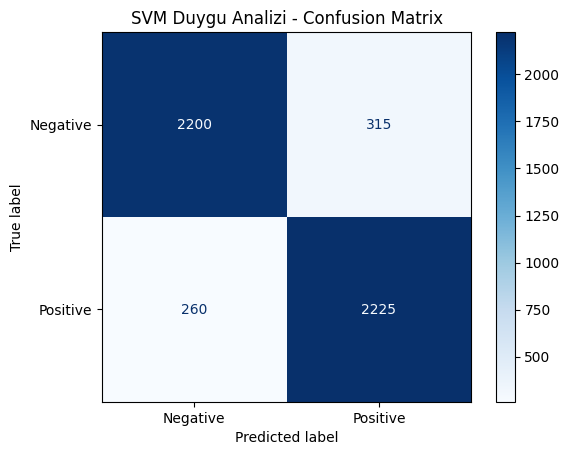

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Karışıklık matrisini oluştur
cm = confusion_matrix(y_test, y_pred)

# Matrisin görselleştirilmesi
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("SVM Duygu Analizi - Confusion Matrix")
plt.show()

